In [1]:
from emoinvest.stock_data_importer.stock_import import get_single_stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=2)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

height has been deprecated.



In [2]:
# S&P500 ticker symbol = ''^GSPC'

In [5]:
df = get_single_stock('^GSPC', '2016-01-01', '2018-11-10')
df.head()

,high,low,open,close,volume,adj_close,ticker_symbol
Date,,,,,,,
2016-01-04,2038.200,1989.680,2038.200,2012.660,4304880000,2012.660,^GSPC
2016-01-05,2021.940,2004.170,2013.780,2016.710,3706620000,2016.710,^GSPC
2016-01-06,2011.710,1979.050,2011.710,1990.260,4336660000,1990.260,^GSPC
2016-01-07,1985.320,1938.830,1985.320,1943.090,5076590000,1943.090,^GSPC
2016-01-08,1960.400,1918.460,1945.970,1922.030,4664940000,1922.030,^GSPC


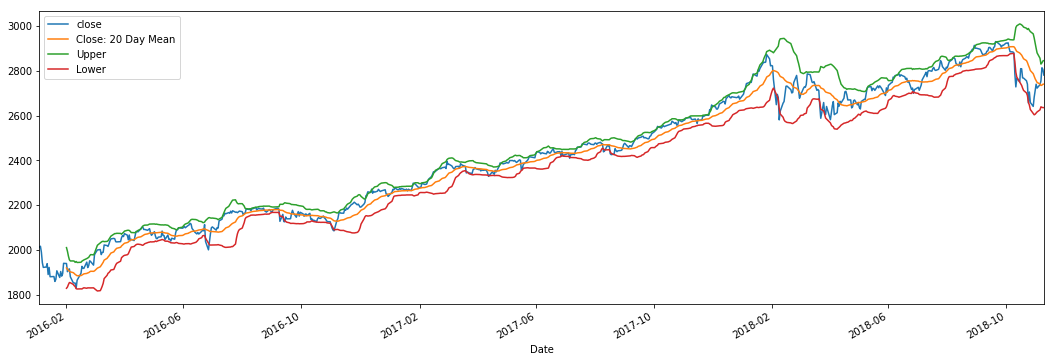

In [6]:
## Bolinger bands
# Close 20 MA
df['Close: 20 Day Mean'] = df['close'].rolling(20).mean()
# Upper = 20M + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['close'].rolling(20).std())
# Close
df[['close', 'Close: 20 Day Mean', 'Upper', 'Lower']].plot(figsize=(18,6));